# Ultimate Inc. Challenge

### Part 1 ‐ Exploratory data analysis

Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [35]:
# Here we have 2 json files . We will read from both one by one . We will pandas read_json method
logins=pd.read_json('logins.json')
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [36]:
print('dataset has {} rows and {} columns'.format(logins.shape[0],logins.shape[1]))


dataset has 93142 rows and 1 columns


In [37]:
# Here we find out that we have only one column here in the Logins table and its data type is datetime.
logins.dtypes

login_time    datetime64[ns]
dtype: object

In [38]:
logins.isna().sum()
# There is no null value is present in the dataset

login_time    0
dtype: int64

In [39]:
# First we will add new column name "count" in the dataset for resampling
logins['count']=1

#then we will set column "login_time" as an index to perform resampling
logins.set_index("login_time", inplace = True)

logins

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1
...,...
1970-04-13 18:50:19,1
1970-04-13 18:43:56,1
1970-04-13 18:54:02,1


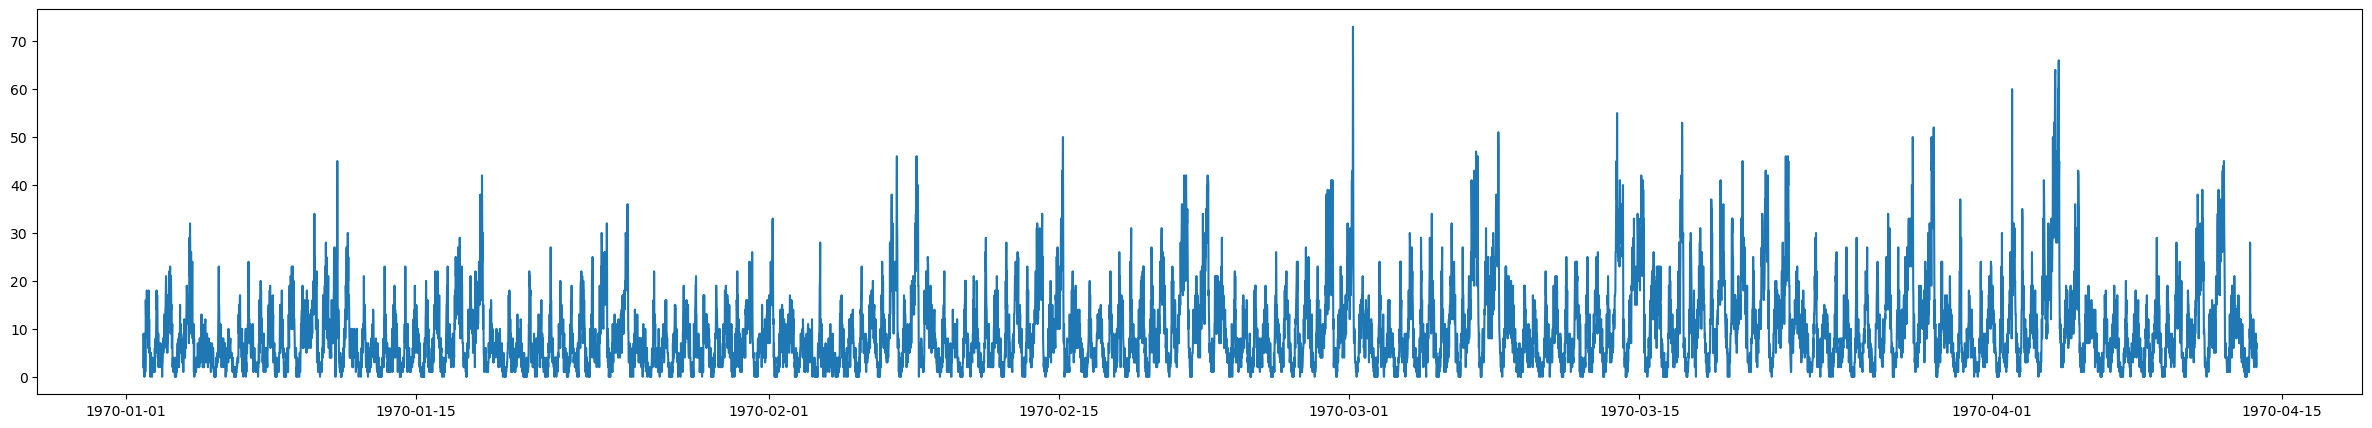

In [55]:

logins_count=logins.resample('15T').sum()
plt.figure(figsize =(30, 5))
plt.plot(logins_count)

we got sinusoidal wave pattern when we try to plot 15 min interval over whole dataset. We can also see some spikes after every specific time interval

In [43]:
logins_count

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


In [41]:
logins_count.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


we can see that on average 7 users login in 15 min time interval .

In [57]:

#create new column month_day
logins_count = logins_count.assign(month_day=logins_count.index.day)

#create new column weekday
logins_count = logins_count.assign(weekday=logins_count.index.weekday)

#create new column month
logins_count = logins_count.assign(month=logins_count.index.month)



logins_count.tail()

,count,month_day,weekday,month
login_time,,,,
1970-04-13 17:45:00,5,13,0,4
1970-04-13 18:00:00,5,13,0,4
1970-04-13 18:15:00,2,13,0,4
1970-04-13 18:30:00,7,13,0,4
1970-04-13 18:45:00,6,13,0,4


21    25
4     22
22    17
15    15
7     13
29    13
28    13
8     13
12    13
14    11
Name: month_day, dtype: int64


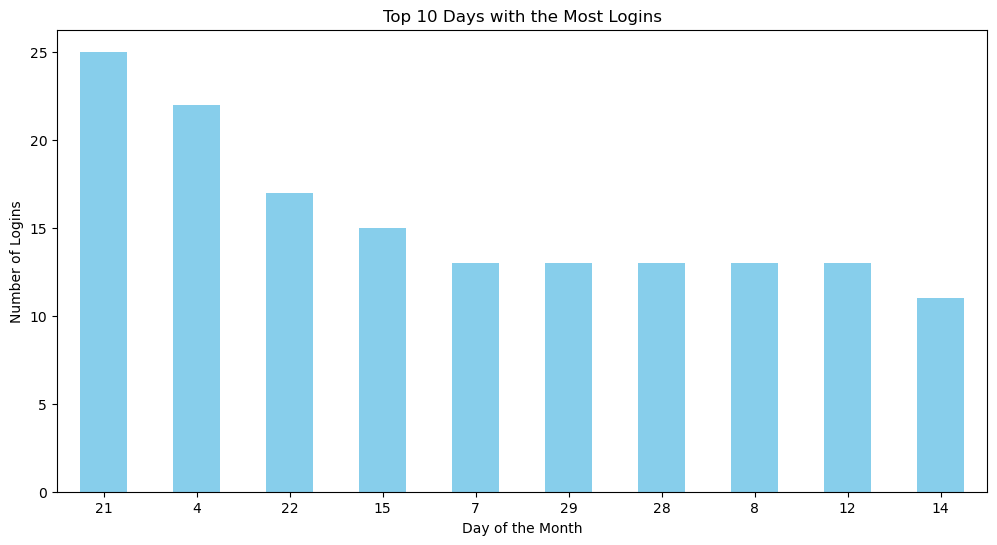

In [78]:
max_value = np.quantile(logins_count,0.99)
logins_data = logins_count[logins_count['count']>max_value]

# Count and print the top 10 values
top_days = logins_data['month_day'].value_counts().head(10)
print(top_days)

# Plotting
plt.figure(figsize=(12, 6))
top_days.plot(kind='bar', color='skyblue')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Logins')
plt.title('Top 10 Days with the Most Logins')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()


6    93
5    90
4    39
3    10
2     6
1     6
0     2
Name: weekday, dtype: int64


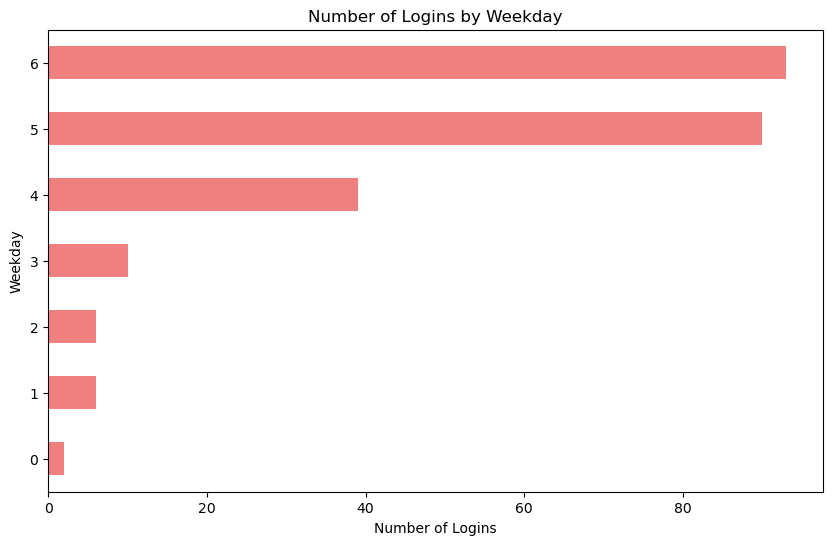

In [86]:
# Count and print the values
weekday_counts = logins_data['weekday'].value_counts()
print(weekday_counts)

plt.figure(figsize=(10, 6))
weekday_counts.sort_index().plot(kind='barh', color='lightcoral')
plt.ylabel('Weekday')
plt.xlabel('Number of Logins')
plt.title('Number of Logins by Weekday')
plt.show()

The surges in user logins are notably concentrated during the weekends, a pattern that aligns with expectations. This occurrence is logical, given that a significant number of users utilize ride-sharing apps for transportation to social gatherings, parties, and bars—activities that predominantly take place on weekends.

3    121
4     61
2     54
1     10
Name: month, dtype: int64


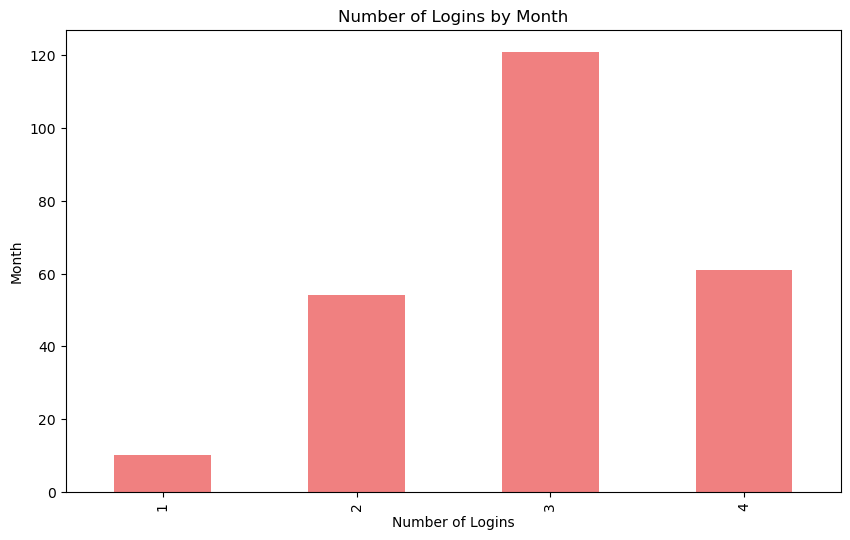

In [98]:
month_count=logins_data['month'].value_counts()
print(month_count)

plt.figure(figsize=(10, 6))
month_count.sort_index().plot(kind='bar', color='lightcoral')
plt.ylabel('Month')
plt.xlabel('Number of Logins')
plt.title('Number of Logins by Month')
plt.show()

<Axes: xlabel='login_time'>

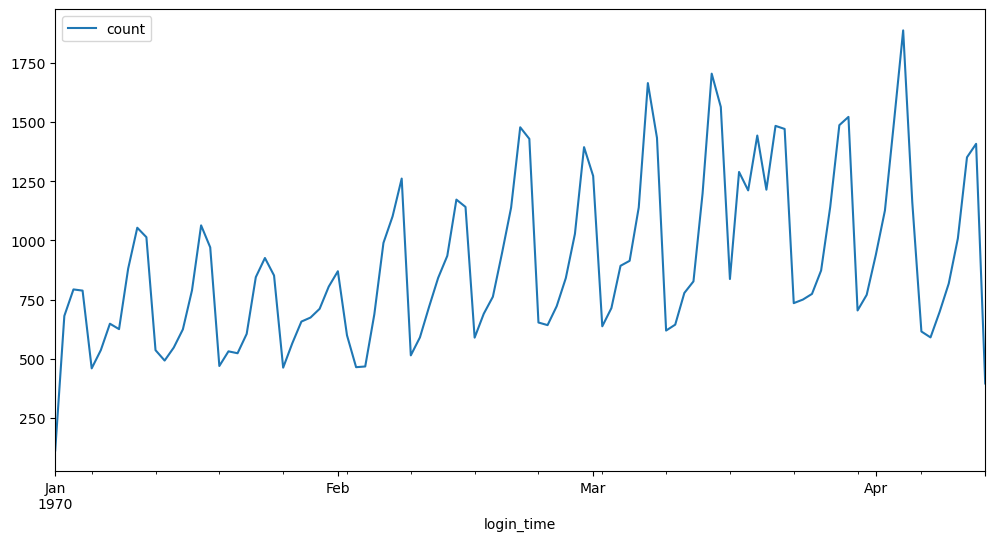

In [94]:
#resample to daily frequency
df_day = logins.resample('1D').sum()
df_day.plot(kind='line',figsize=(12,6))

Resampling to daily frequency shows there is an increasing trend of the average number of logins. At first, through the month of January, there seems to be little or no change in the average number of daily logins, then February starts the increasing trend

### Part 2 : Experiment and Metrics Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on: a. how you will implement the experiment b. what statistical test(s) you will conduct to verify the significance of the observation c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

Ans.1.

Ans.2.

### Part 3 : Predictive Modelling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).


In [100]:
ultimate_challenge = pd.read_json('ultimate_data_challenge.json')
ultimate_challenge.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [101]:
ultimate_challenge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [102]:
# Typecasting the date columns
ultimate_challenge['signup_date']= pd.to_datetime(ultimate_challenge['signup_date'])
ultimate_challenge['last_trip_date']=pd.to_datetime(ultimate_challenge['last_trip_date'])

In [104]:
# Checking for Null values
ultimate_challenge.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

We can see that three columns have Null values . So we will fill those columns with their respective appropriate values. Because we cannot build a ML model with dataset having Null values

In [105]:
# Calculate the median of the column
median_value = ultimate_challenge['avg_rating_of_driver'].median()

# Fill the Null values in the column with the calculated median
ultimate_challenge['avg_rating_of_driver'] = ultimate_challenge['avg_rating_of_driver'].fillna(median_value)

In [107]:
# Calculate the median of the column
median_value = ultimate_challenge['avg_rating_by_driver'].median()

# Fill the Null values in the column with the calculated median
ultimate_challenge['avg_rating_by_driver'] = ultimate_challenge['avg_rating_by_driver'].fillna(median_value)

In [108]:
# Fill Null values with 'others'
ultimate_challenge['phone'] = ultimate_challenge['phone'].fillna('Others')

In [110]:
ultimate_challenge.isna().sum() # Now dataset have no Null values

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

We will now add a new column name "Active User" .Active user is a user who are having some activities in the last 30 days. We will make some assumptions that whatever will be the max date of 'last_trip_date' will be our current date and we will determine users activity from that current date to past 30 days.

In [111]:
current_date=ultimate_challenge['last_trip_date'].max()

#find if user qualifies as active
ultimate_challenge['active'] = ultimate_challenge['last_trip_date'].apply(lambda date: 0 if (current_date-date).days>30 else 1)
ultimate_challenge.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [119]:
a=ultimate_challenge['active'].value_counts()
b=(ultimate_challenge['active'].value_counts(normalize = True)*100).rename('Distribution')
temp=pd.concat([a,b], axis = 1) 
temp

,active,Distribution
0,31196,62.392
1,18804,37.608


<Axes: >

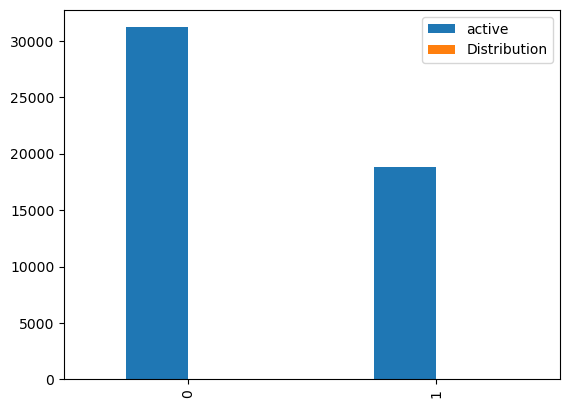

In [125]:
temp.plot(kind='bar')

we can see that only 37% of the users are active overall

In [123]:
#create dummy variables for categorical features
X = pd.get_dummies(ultimate_challenge,columns=['city','phone','ultimate_black_user'])
X.head()
#set target and drop unuseful columns
y = X['active']
X = X.drop(['last_trip_date','signup_date','active'],axis=1)

X.shape

(50000, 15)

In [124]:
y.shape

(50000,)